In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [3]:
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, '..', 'data')
train_dir = os.path.join(data_dir, 'train.csv')
cols_desc_dir = os.path.join(data_dir, 'data_description.txt')

In [4]:
train = pd.read_csv(train_dir)

In [5]:
train.shape

(1460, 81)

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Missing data
NaN's determining that there is no such feature in house

In [7]:
missing_sums = train.isnull().sum().sort_values(ascending=False).astype(dtype=float)
missing_sums = missing_sums[missing_sums>0]
missing_percents = missing_sums/train.shape[0]

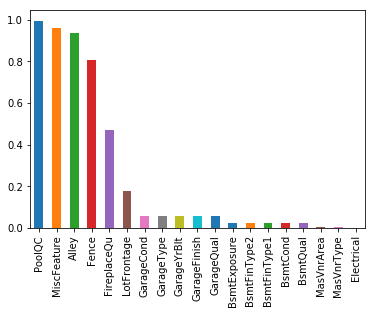

In [8]:
missing_percents.plot(kind='bar')

# Sale Price

### Price description

In [10]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Pirice distribution

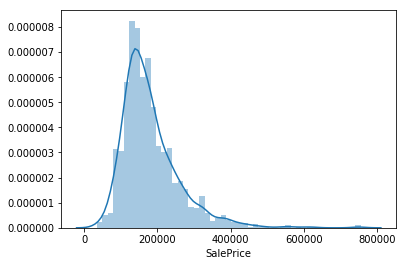

In [11]:
sns.distplot(train['SalePrice'])

#### Log-transformation

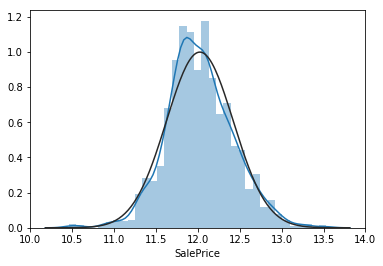

In [12]:
log_price = np.log(train['SalePrice'])
sns.distplot(log_price, fit=stats.norm)

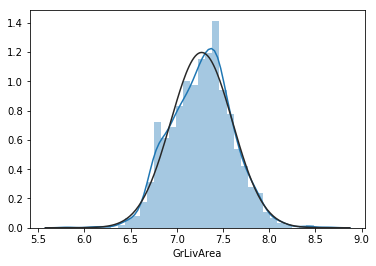

In [13]:
log_grLiv_area = np.log(train['GrLivArea'])
sns.distplot(log_grLiv_area, fit=stats.norm)

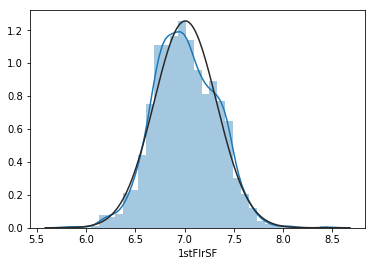

In [14]:
log_1stFlr_area = (np.log(train['1stFlrSF']))
sns.distplot(log_1stFlr_area, fit=stats.norm)

## Price correlation

In [15]:
pairwise_corr = train.corr(method='pearson')
sale_price_corr = pairwise_corr['SalePrice'].sort_values(ascending=False)
sale_price_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

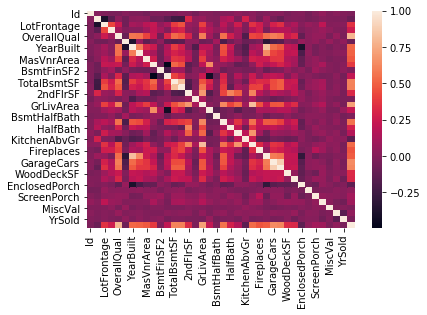

In [16]:
sns.heatmap(pairwise_corr)    

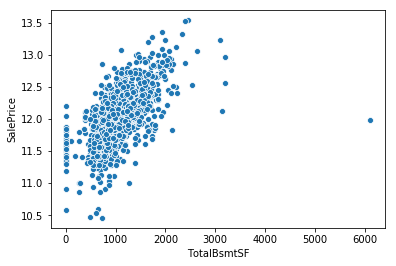

In [17]:
sns.scatterplot(x=train['TotalBsmtSF'], y=log_price)

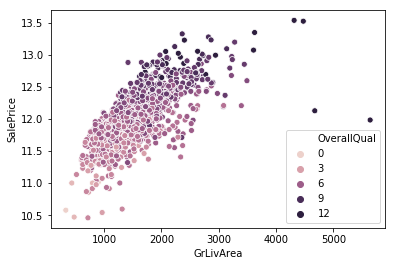

In [18]:
sns.scatterplot(x=train['GrLivArea'], y=log_price, hue="OverallQual", data=train)

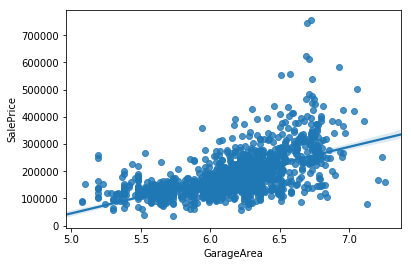

In [19]:
nonzero_grg_area = np.log(train['GarageArea'].where(train['GarageArea']>0))
sns.regplot(nonzero_grg_area, train['SalePrice'])

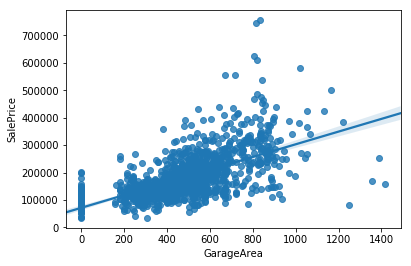

In [20]:
sns.regplot(train['GarageArea'], train['SalePrice'])

In [32]:
dataset = train_miss_drop
cols_transform = ['SalePrice', 'GrLivArea', '1stFlrSF']
dataset[cols_transform] = dataset[cols_transform].apply(np.log)
dataset = pd.get_dummies(dataset)
dataset.to_csv(os.path.join(data_dir, 'preprocessed.csv'))